In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch # <-- for dendrogram 

In [3]:
df = pd.read_csv('sales_data_sample.csv' , encoding = 'latin')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
features = df[['SALES' , 'QUANTITYORDERED']].copy()

In [5]:
features = features.dropna()

In [6]:
features.head()

,SALES,QUANTITYORDERED
0,2871.00,30
1,2765.90,34
2,3884.34,41
3,3746.70,45
4,5205.27,49


In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features , columns = ['sales' , 'quantity'])

In [8]:
scaled_data.head()

,sales,quantity
0,-0.370825,-0.522891
1,-0.427897,-0.112201
2,0.179443,0.606505
3,0.104701,1.017195
4,0.896740,1.427884



--- Finding K with Elbow Method ---


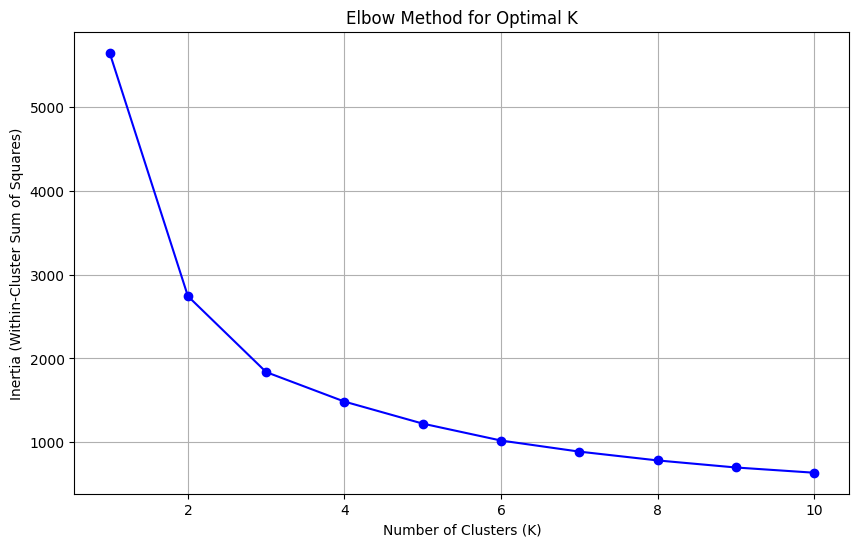

Look at the graph! The 'elbow' is the optimal K.


In [63]:

print("\n--- Finding K with Elbow Method ---")
inertia = []  
k_range = range(1, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k,         # The number of clusters to form
                    init='k-means++',     # Smart initialization of centroids
                    n_init=10,            # Run 10 times with different random seeds
                    random_state=42)      # For reproducible results
    
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-') # 'bo-' creates a blue line with dots
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

print("Look at the graph! The 'elbow' is the optimal K.")

chosen_k = 4 

In [9]:
model = KMeans(n_clusters = 4 , random_state = 42, init = 'k-means++', n_init = 10)
model.fit(scaled_data)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [13]:
new_labels = model.labels_
centroids = model.cluster_centers_
centroid_coor = scaler.inverse_transform(centroids)
print(centroid_coor)

[[4121.0862       32.14666667]
 [6662.17739872   45.95309168]
 [2086.53624754   25.85068762]
 [3140.38319293   43.35733696]]


In [11]:
features['cluster'] = new_labels
features.head()

,SALES,QUANTITYORDERED,cluster
0,2871.00,30,2
1,2765.90,34,0
2,3884.34,41,3
3,3746.70,45,3
4,5205.27,49,1


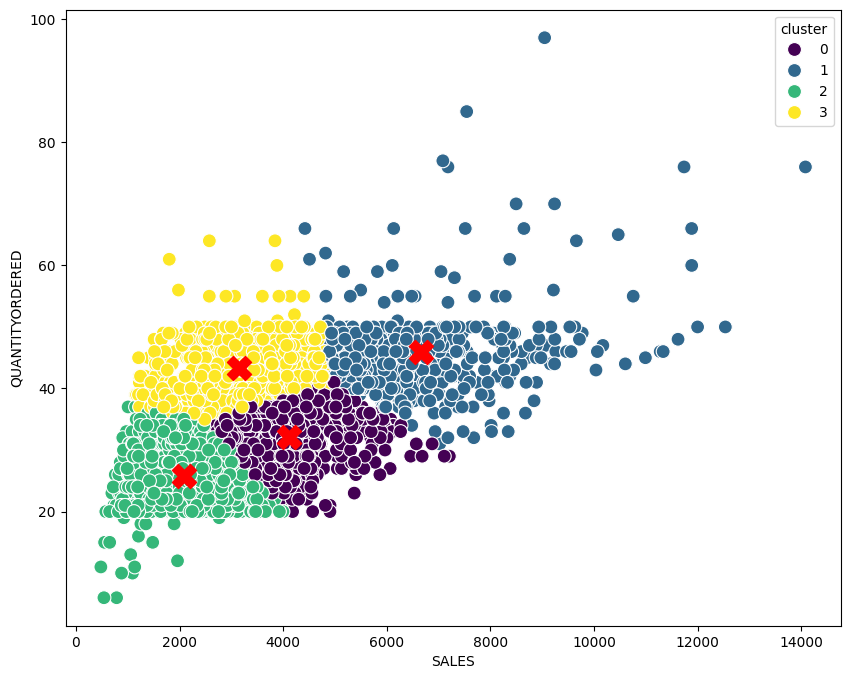

In [12]:
plt.figure(figsize = (10 , 8))
sns.scatterplot(data = features, x = 'SALES', y = 'QUANTITYORDERED', hue = 'cluster', s = 100, palette='viridis')
plt.scatter(centroid_coor[: , 0] , centroid_coor[: , 1] , color = 'red', marker = 'X', s = 300)